## Reference
- https://towardsdatascience.com/svd-in-machine-learning-pca-f25cf9b837ae

# 1. (2 pts) Dimension reduction using principal component analysis (PCA)

 If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized easily.

## 1.1(1pt) Using Singular-Value Decomposition (SVD) method, please decompose 1st and 2nd principal components and project them to the data.

- Please draw 2D plot using the 1st and 2nd principal components.
- Please legend different colors for the 10 labels in the graph.


In [1]:
import pandas as pd

df = pd.read_csv('fashion_mnist1.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(f"{X.shape = }, {y.shape = }")
y

X.shape = (10000, 784), y.shape = (10000,)


array([5, 7, 6, ..., 5, 2, 7])

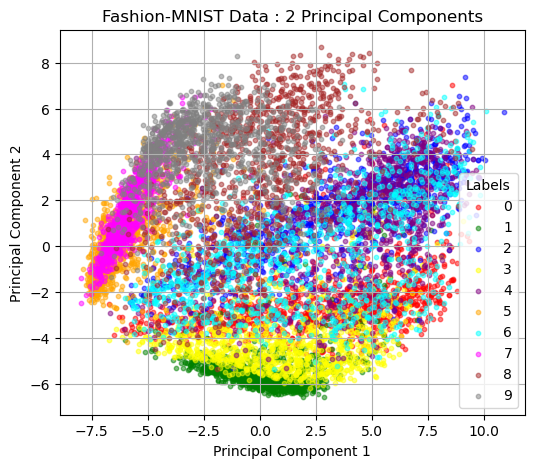

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class PCA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        
    def mean_centric(self, X):
        X = X/255.0
        self.mean = np.mean(X.T, axis=1)
        # std = np.std(X.T, axis=1)
        # return (X - mean) /std
        return X - self.mean
    
    def covariance(self, X):
        return np.cov(X.T)
    
    def eigen_values_and_eigenvectors(self, X):
        eigen_values, eigen_vectors = np.linalg.eig(X)
        print("eigen_values = \n", eigen_values)
        print("eigen_vectors = \n", eigen_vectors)
        return eigen_values, eigen_vectors
    
    def sort_eigen_values(self, eigen_values, eigen_vectors):
        sorted_indices = np.argsort(eigen_values)[::-1]
        print(f"{sorted_indices = }")
        sorted_eigen_values = eigen_values[sorted_indices]
        sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
        return sorted_eigen_values, sorted_eigen_vectors
    
    def fit(self, X):
        X_mean_centric = self.mean_centric(X)
        print("after scaling X = \n", X_mean_centric)
        cov = self.covariance(X_mean_centric)
        print("covariance matrix = \n", cov)
        eigen_values, eigen_vectors = self.eigen_values_and_eigenvectors(cov)
        eigen_values, eigen_vectors = self.sort_eigen_values(eigen_values, eigen_vectors)
        selected_eigen_vectors = eigen_vectors[:, :self.n_components]
        self.components_ = selected_eigen_vectors
        project_data = self.transform(X)
        return project_data
    
    def fit_svd(self, X):
        X_mean_centric = self.mean_centric(X)
        U, S, Vt = np.linalg.svd(X_mean_centric, full_matrices=False)
        self.components_ = Vt.T[:, :self.n_components]
        pca_svd = X_mean_centric @ self.components_
        return pca_svd
    
    def transform(self, X):
        return np.dot(X, self.components_)
    
    def inverse_transform(self, X):
        # print(X.shape, self.components_.shape, self.mean.shape)
        return np.dot(X, self.components_.T) + self.mean
    
    def plot(self, X):
        colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

        plt.figure(figsize=(6,5))
        for i in range(10):
            idx = y == i
            plt.scatter(X[idx, 0], X[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)
        
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend(title='Labels')
        plt.title('Fashion-MNIST Data : 2 Principal Components')
        plt.grid(True)
        plt.show()
        
 
my_pca = PCA(n_components=2)
my_pca_res = my_pca.fit_svd(df.values)
my_pca.plot(my_pca_res)



## 1.2(1pt) As we discussed during the class, we can compress images using PCA. 𝐴 ≈ 𝑈𝑘∑𝑘𝑉 𝑘𝑇

- Please select 10 images. The selected images should have different labels. Please compress the images using k=2, 5, 10. Then, visualize the original images and the compressed images with different k.

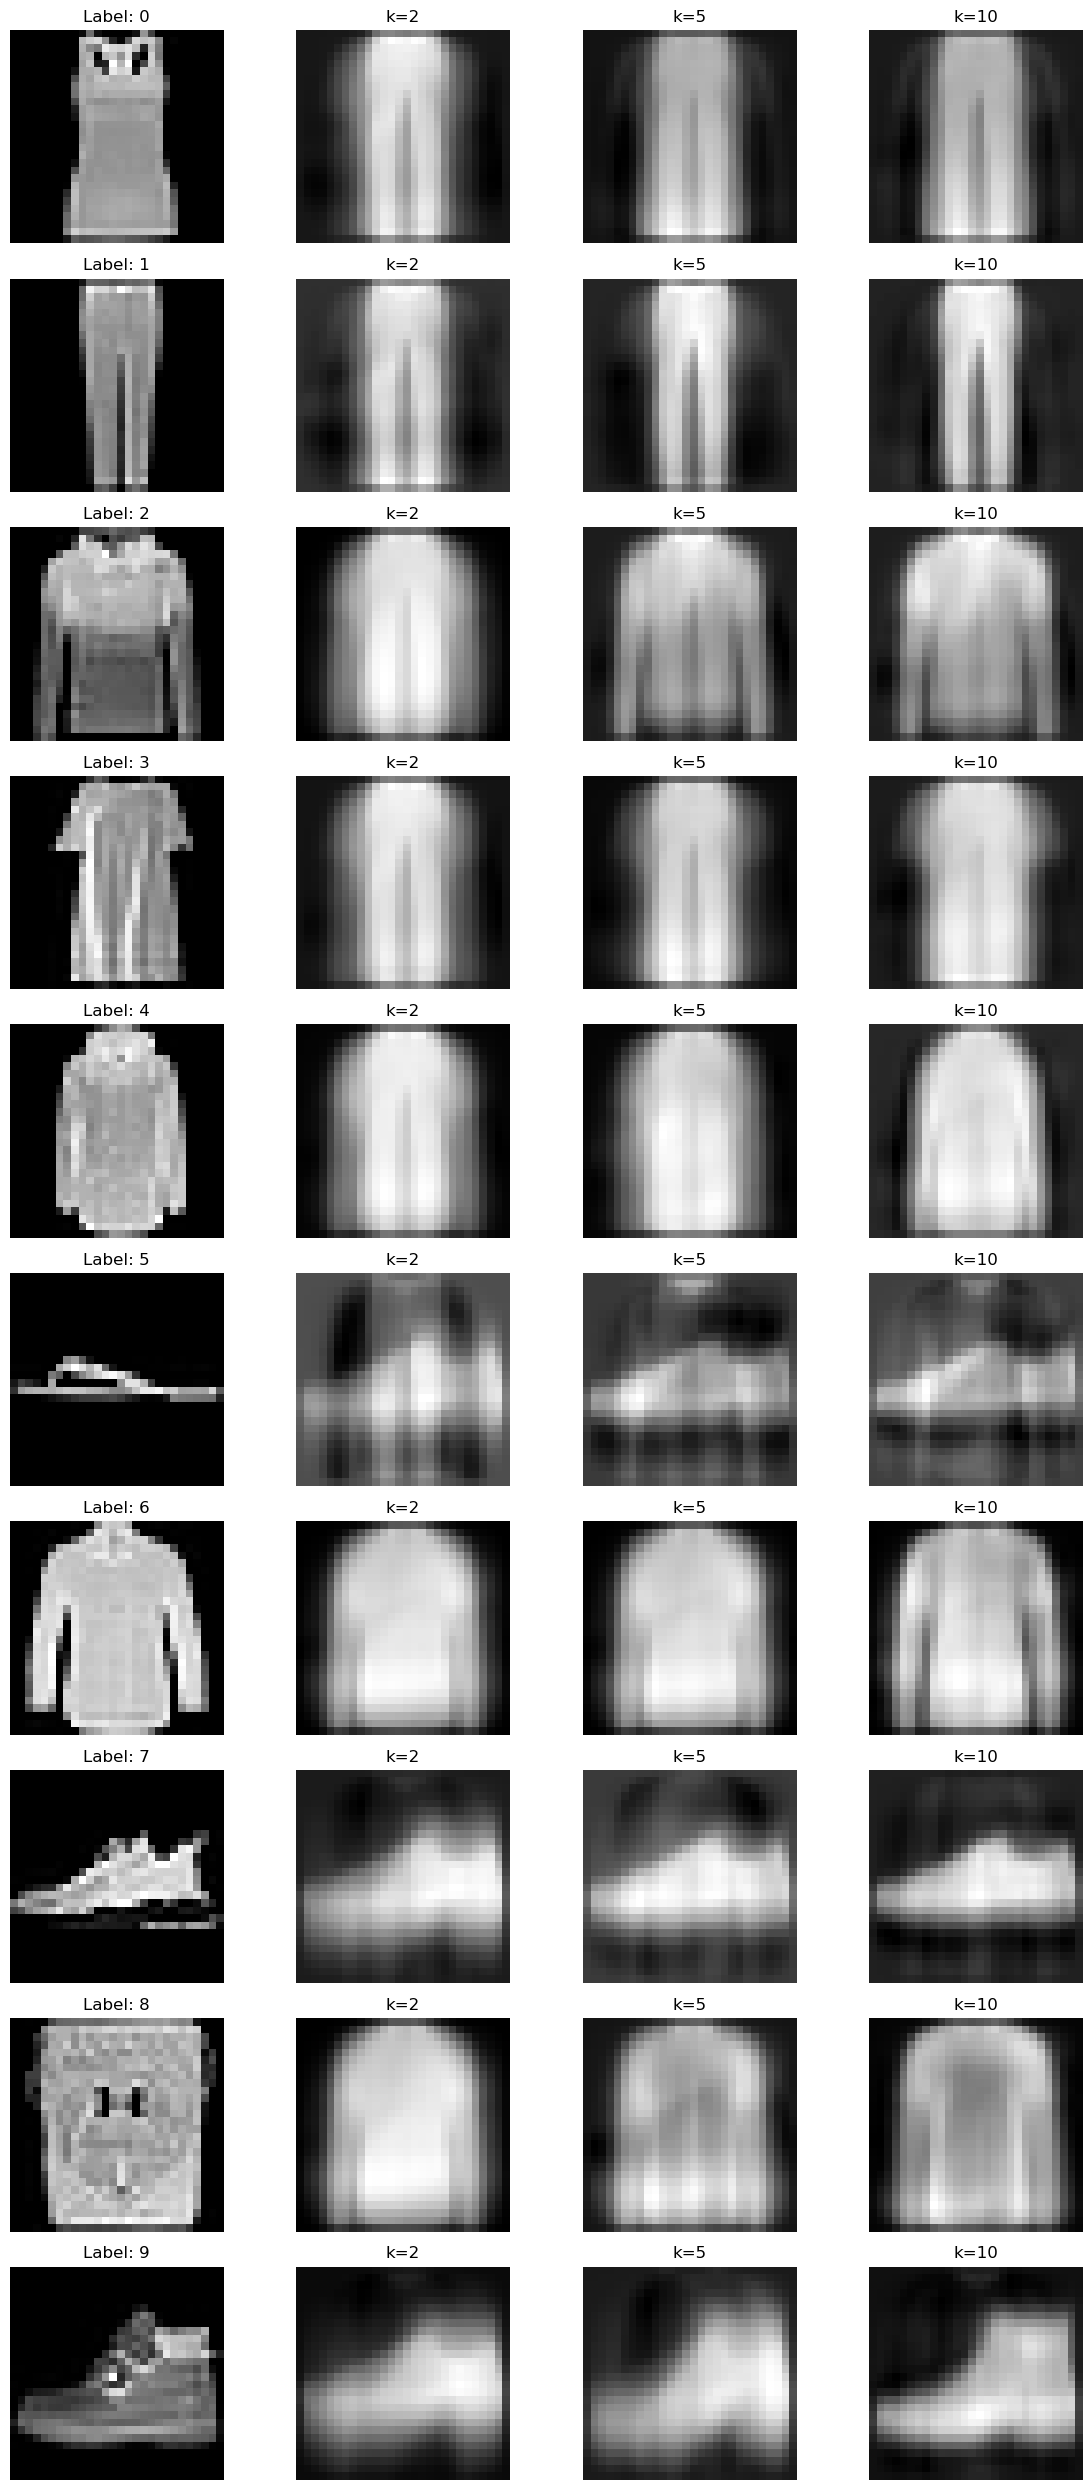

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X (images) and y (labels) are already loaded and defined
# If not, you need to load your dataset here

# Step 1: Assign images and labels
images, labels = X, y

# Step 2: Select 10 images with different labels
unique_labels = np.unique(labels)
selected_images = []
selected_labels = []

for label in unique_labels:
    label_indices = np.where(labels == label)[0]
    selected_images.append(images[label_indices[0]])  # Select the first occurrence of each label
    selected_labels.append(label)

selected_images = np.array(selected_images)

# Step 3: Compress images using PCA with k=2, 5, 10
def apply_pca_and_reconstruct(X_train, images_to_reconstruct, n_components):
    """
    Fits PCA on X_train and reconstructs images_to_reconstruct using the fitted PCA model.
    
    Parameters:
    X_train (np.ndarray): The dataset to fit PCA on (e.g., all images).
    images_to_reconstruct (np.ndarray): The images to transform and reconstruct (e.g., selected images).
    n_components (int): Number of principal components to keep.
    
    Returns:
    np.ndarray: Reconstructed images.
    """
    pca = PCA(n_components=n_components)
    pca.fit(X_train)  # Fit PCA on the entire dataset
    images_pca = pca.transform(images_to_reconstruct)  # Compress the selected images
    images_reconstructed = pca.inverse_transform(images_pca)  # Reconstruct the images
    return images_reconstructed

# Reconstruct images with k=2, k=5, k=10
reconstructed_k2 = apply_pca_and_reconstruct(images, selected_images, 2)
reconstructed_k5 = apply_pca_and_reconstruct(images, selected_images, 5)
reconstructed_k10 = apply_pca_and_reconstruct(images, selected_images, 10)


def plot_images(original, reconstructed_k2, reconstructed_k5, reconstructed_k10, labels):
    n = len(original)
    # Create a grid of subplots: n rows, 4 columns
    fig, axes = plt.subplots(nrows=n, ncols=4, figsize=(12, 2.5 * n))
    
    for i in range(n):
        # Original image
        ax = axes[i, 0]
        ax.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')

        # Reconstructed image (k=2)
        ax = axes[i, 1]
        ax.imshow(reconstructed_k2[i].reshape(28, 28), cmap='gray')
        ax.set_title("k=2")
        ax.axis('off')

        # Reconstructed image (k=5)
        ax = axes[i, 2]
        ax.imshow(reconstructed_k5[i].reshape(28, 28), cmap='gray')
        ax.set_title("k=5")
        ax.axis('off')

        # Reconstructed image (k=10)
        ax = axes[i, 3]
        ax.imshow(reconstructed_k10[i].reshape(28, 28), cmap='gray')
        ax.set_title("k=10")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


# Show the images
plot_images(selected_images, reconstructed_k2, reconstructed_k5, reconstructed_k10, selected_labels)


### Observations
- As we can see that with k=10, the projected image is very similar to original image.

In [4]:
# selected_images = []
# selected_labels = []
# 
# images, labels = X, y
# for i in range(10):
#     idx = np.where(labels == i)[0][0]  # Index of the first occurrence of label i
#     selected_images.append(images[idx])
#     selected_labels.append(labels[idx])
#     
# image_matrices = [img.reshape(28,28) for img in selected_images]
# 
# 
# k_values = [2, 5, 10]
# reconstructed_images = []
# 
# for img in image_matrices:
#     U, S, Vt = np.linalg.svd(img, full_matrices=False)
#     img_reconstructions = []
#     for k in k_values:
#         # Keep the first k singular values/components
#         U_k = U[:, :k]
#         S_k = S[:k]
#         Vt_k = Vt[:k, :]
#         # Reconstruct the image
#         img_reconstructed = np.dot(U_k, np.dot(np.diag(S_k), Vt_k))
#         img_reconstructions.append(img_reconstructed)
#     reconstructed_images.append(img_reconstructions)
# 
# fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(10, 20))
# 
# for i in range(10):
#     # Original image
#     axes[i,0].imshow(image_matrices[i], cmap='gray')
#     axes[i,0].set_title('Original Label: {}'.format(selected_labels[i]))
#     axes[i,0].axis('off')
#     # Reconstructed images
#     for j, k in enumerate(k_values):
#         axes[i,j+1].imshow(reconstructed_images[i][j], cmap='gray')
#         axes[i,j+1].set_title('k={}'.format(k))
#         axes[i,j+1].axis('off')
# 
# plt.tight_layout()
# plt.show()
# 
#     

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset (you can replace this with your own dataset)
# Let's create a DataFrame with random data for demonstration
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.rand(4),
    'feature2': np.random.rand(4),
    'feature3': np.random.rand(4),
})
df


# marks = np.array([[3,4], [2,8], [6,9]])
# df = pd.DataFrame(marks, columns=['physics', 'maths'])
# print(df)

,feature1,feature2,feature3
0,0.374540,0.156019,0.601115
1,0.950714,0.155995,0.708073
2,0.731994,0.058084,0.020584
3,0.598658,0.866176,0.969910


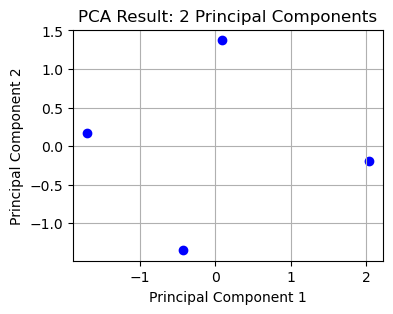

Explained variance by component: [0.60123496 0.31504495]


,PC1,PC2
0,0.089672,1.373088
1,-0.427152,-1.351036
2,-1.697723,0.175558
3,2.035204,-0.197610


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 4: Plot the results
plt.figure(figsize=(4, 3))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', marker='o')
plt.title('PCA Result: 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Step 5: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by component: {explained_variance}')
pca_df


In [7]:
# class PCA:
#     
#     def __init__(self, n_components):
#         self.n_components = n_components
#         
#     def mean_centric(self, X):
#         mean = np.mean(X.T, axis=1)
#         std = np.std(X.T, axis=1)
#         print(f"{mean = }")
#         return (X - mean) /std
#         
#     def covariance(self, X):
#         return np.cov(X.T)
#     
#     def eigen_values_and_eigenvectors(self, X):
#         eigen_values, eigen_vectors = np.linalg.eig(X)
#         print("eigen_values = \n", eigen_values)
#         print("eigen_vectors = \n", eigen_vectors)
#         return eigen_values, eigen_vectors
#     
#     def sort_eigen_values(self, eigen_values, eigen_vectors):
#         sorted_indices = np.argsort(eigen_values)[::-1]
#         print(f"{sorted_indices = }")
#         sorted_eigen_values = eigen_values[sorted_indices]
#         sorted_eigen_vectors = eigen_vectors[:, sorted_indices]
#         return sorted_eigen_values, sorted_eigen_vectors
#     
#     def fit(self, X):
#         X_mean_centric = self.mean_centric(X)
#         print("after scaling X = \n", X_mean_centric)
#         cov = self.covariance(X_mean_centric)
#         print("covariance matrix = \n", cov)
#         eigen_values, eigen_vectors = self.eigen_values_and_eigenvectors(cov)
#         eigen_values, eigen_vectors = self.sort_eigen_values(eigen_values, eigen_vectors)
#         selected_eigen_vectors = eigen_vectors[:, :self.n_components]
#         
#         project_data = np.dot(X_mean_centric, selected_eigen_vectors)
#         print(project_data.T)
#         return project_data
#     
#     def fit_svd(self, X):
#         X_mean_centric = self.mean_centric(X)
#         U, S, Vt = np.linalg.svd(X_mean_centric, full_matrices=False)
#         pca_svd = U[:, :self.n_components]
#         return pca_svd
#         
#     def plot(self, X):
#         # print(X)
#         # # Step 4: Plot the results
#         # plt.figure(figsize=(4, 3))
#         # plt.scatter(X.T[0], X.T[1], c='blue', marker='o')
#         # plt.title('PCA Result: 2 Principal Components')
#         # plt.xlabel('Principal Component 1')
#         # plt.ylabel('Principal Component 2')
#         # plt.grid()
#         # plt.show()
#         colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']
# 
#         plt.figure(figsize=(6,5))
#         for i in range(10):
#             idx = y == i
#             plt.scatter(projected_data[idx, 0], projected_data[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)
#         
#         plt.xlabel('Principal Component 1')
#         plt.ylabel('Principal Component 2')
#         plt.legend(title='Labels')
#         plt.title('Fashion-MNIST Data : 2 Principal Components')
#         plt.show()
#         
#  
# my_pca = PCA(n_components=2)
# my_pca_res = my_pca.fit(df.values)
# my_pca.plot(my_pca_res)


In [8]:
pca_df

,PC1,PC2
0,0.089672,1.373088
1,-0.427152,-1.351036
2,-1.697723,0.175558
3,2.035204,-0.197610


# 1. (2 pts) Dimension reduction using principal component analysis (PCA)

## If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized easily.

### 1.1(1pt) Using Singular-Value Decomposition (SVD) method, please decompose 1st and 2nd principal components and project them to the data.

    - Please draw 2D plot using the 1st and 2nd principal components.
    - Please legend different colors for the 10 labels in the graph.

### 1.2(1pt) As we discussed during the class, we can compress images using PCA. 𝐴 ≈ 𝑈𝑘∑𝑘𝑉 𝑘𝑇

    - Please select 10 images. The selected images should have different labels. Please compress the images using k=2, 5, 10. Then, visualize the original images and the compressed images with different k.

In [9]:
### GPT
df = pd.read_csv('fashion_mnist1.csv')
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(f"{X.shape = }, {y.shape = }")
y

X.shape = (10000, 784), y.shape = (10000,)


array([5, 7, 6, ..., 5, 2, 7])

## Library

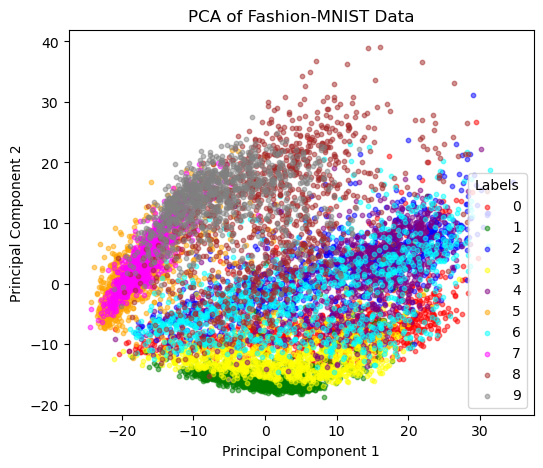

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 2: Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']

plt.figure(figsize=(6,5))
for i in range(10):
    idx = y == i
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels')
plt.title('PCA of Fashion-MNIST Data')
plt.show()

## My Code

https://towardsdatascience.com/svd-in-machine-learning-pca-f25cf9b837ae

In [11]:
# # Center the data by subtracting the mean
# X_mean = np.mean(X, axis=0)
# X_centered = (X - X_mean) 
# 
# # X_std = np.std(X, axis=0)
# # X_centered = (X - X_mean) / X_std
# 
# # Perform SVD
# U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
# 
# # Project the data onto the first two principal components
# PCs = Vt[:2, :]
# projected_data = np.dot(X_centered, PCs.T)
# # projected_data = U[:, :2]
# # Define colors for each label
# colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray']
# 
# plt.figure(figsize=(6,5))
# for i in range(10):
#     idx = y == i
#     plt.scatter(projected_data[idx, 0], projected_data[idx, 1], c=colors[i], label=str(i), s=10, alpha=0.5)
# 
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Labels')
# plt.title('PCA of Fashion-MNIST Data')
# plt.show()

In [12]:
# selected_images = []
# selected_labels = []
# 
# images, labels = X, y
# for i in range(10):
#     idx = np.where(labels == i)[0][0]  # Index of the first occurrence of label i
#     selected_images.append(images[idx])
#     selected_labels.append(labels[idx])
# 
# image_matrices = [img.reshape(28,28) for img in selected_images]
# 
# 
# k_values = [2, 5, 10]
# reconstructed_images = []
# 
# for img in image_matrices:
#     U, S, Vt = np.linalg.svd(img, full_matrices=False)
#     img_reconstructions = []
#     for k in k_values:
#         # Keep the first k singular values/components
#         U_k = U[:, :k]
#         S_k = S[:k]
#         Vt_k = Vt[:k, :]
#         # Reconstruct the image
#         img_reconstructed = np.dot(U_k, np.dot(np.diag(S_k), Vt_k))
#         img_reconstructions.append(img_reconstructed)
#     reconstructed_images.append(img_reconstructions)
# 
# fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(10, 20))
# 
# for i in range(10):
#     # Original image
#     axes[i,0].imshow(image_matrices[i], cmap='gray')
#     axes[i,0].set_title('Original Label: {}'.format(selected_labels[i]))
#     axes[i,0].axis('off')
#     # Reconstructed images
#     for j, k in enumerate(k_values):
#         axes[i,j+1].imshow(reconstructed_images[i][j], cmap='gray')
#         axes[i,j+1].set_title('k={}'.format(k))
#         axes[i,j+1].axis('off')
# 
# plt.tight_layout()
# plt.show()
# 
